# Deep Learning - Assignment 1- CS23MTECH11026 - Bhargav Patel  
<br>

# Question 1
____________________

In [108]:
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# C1, C2 denoting class of dataset (Similarly used further)
def generate_dataset(gamma):
    # Generate dataset using normal distribution and varying separability by gamma
    C1 = np.random.normal(5, 1, size=(500, 2)) + gamma
    C2 = np.random.normal(0, 1, size=(500, 2)) - gamma
    return C1, C2

def add_extra_dim(C1, C2):
    """
    Adding extra dimension to dataset (bias)
    Combaining C1 & C2 dataset into one single variable X and creating lable Y for that. 
    """
    X = np.empty((1000, C1.shape[1] + 1))
    X[:, 0] = 1
    X[::2, 1:3] = C1
    X[1::2, 1:3] = C2

    # Similarly for Y
    Y = np.empty((1000,))
    Y[::2] = 1.0
    Y[1::2] = -1.0
    return X, Y

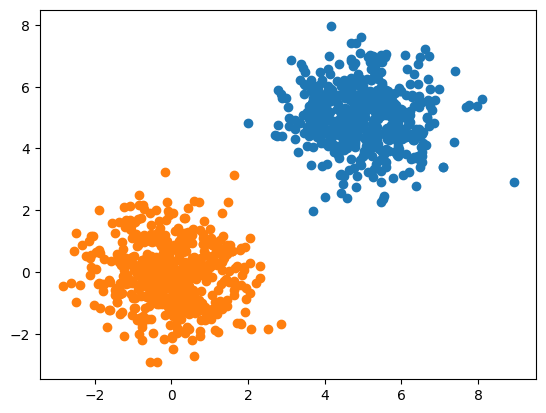

In [110]:
# Just plotting the dataset
C1, C2 = generate_dataset(0)
plt.scatter(C1[:,0], C1[:,1])
plt.scatter(C2[:,0], C2[:,1])

In [111]:
# Function to plot dataset and W before and after training
def plot_data_and_W(C1, C2, W, title, a):
    x = np.linspace(-10,10,100)
    y = -((W[1].item()/W[2].item())*x + (W[0].item()/W[2].item()))
    axes[a].plot(x, y, '-r', label='W')
    axes[a].set_title(title)
    axes[a].set_xlabel('x')
    axes[a].set_ylabel('y')
    axes[a].legend(loc='upper left')
    axes[a].scatter(C1[:,0], C1[:,1])
    axes[a].scatter(C2[:,0], C2[:,1])
    axes[a].grid()

    # Set x-axis and y-axis limits
    x_min = np.min(C2[:, 0]) - 1
    x_max = np.max(C1[:, 0]) + 1
    y_min = np.min(C2[:, 1]) - 1
    y_max = np.max(C1[:, 1]) + 1
    axes[a].set_xlim(x_min, x_max)
    axes[a].set_ylim(y_min, y_max)

### Perceptron Learning Algorithm

In [112]:
def perceptron_learning_algo(X, Y, W, max_epochs):
    overall_updates = 0
    for e in range(max_epochs):
        k = 0
        for i in range(X.shape[0]):
            if X[i].dot(W) * Y[i] <= 0:
                W = W + Y[i] * X[i]
                k += 1
        if k == 0:
            print('Early stopping at epoch number: ',e)
            break
        overall_updates += k
#         print(f"No. of updates at epoch {e} : {k}")
#     print(f"Total updates: {overall_updates}")
    return W, overall_updates

Gamma = 0
Early stopping at epoch number:  1
learned W = [-10.86130958   3.44966416   0.95579542] : k = 18
Early stopping at epoch number:  2
learned W = [-14.14734023   3.20513166   2.87397598] : k = 28
Early stopping at epoch number:  4
learned W = [-14.60077181   2.80311333   2.97876419] : k = 27
Early stopping at epoch number:  16
learned W = [-23.31776089   5.64894298   3.94415533] : k = 59
Early stopping at epoch number:  1
learned W = [-3.50653403  0.75819849  0.76863882] : k = 4


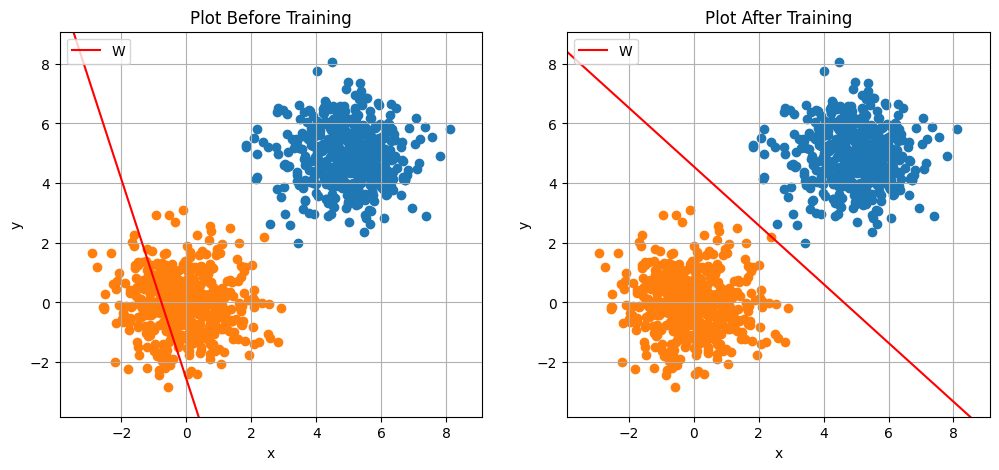



Gamma = 0.4
Early stopping at epoch number:  1
learned W = [-7.41491628  2.13462908  1.39439202] : k = 11
Early stopping at epoch number:  1
learned W = [-9.2146544   1.51327216  2.3755242 ] : k = 14
Early stopping at epoch number:  1
learned W = [-4.55303528  0.97543249  1.34070544] : k = 5
Early stopping at epoch number:  1
learned W = [-10.74596189   0.79683964   2.78765021] : k = 19
Early stopping at epoch number:  3
learned W = [-11.44191036   1.91199689   1.74446549] : k = 16


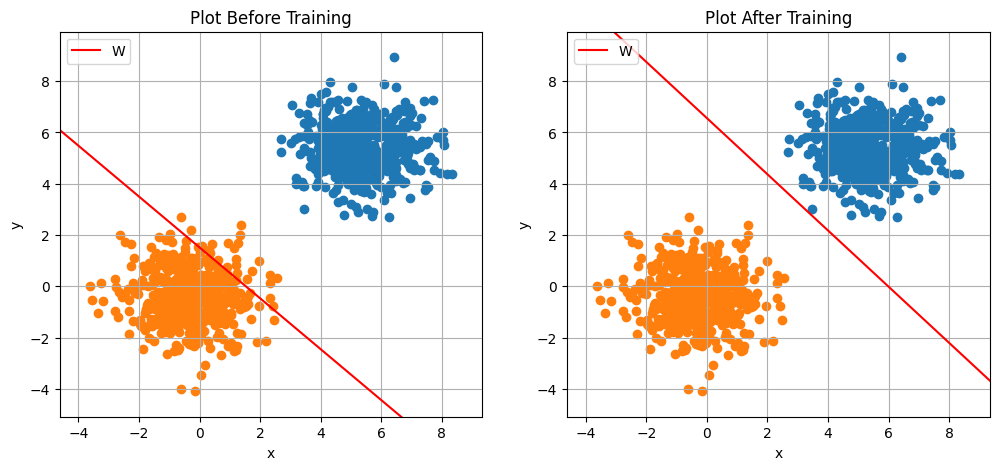



Gamma = 0.8
Early stopping at epoch number:  1
learned W = [-6.87980144  2.74057187  1.37578852] : k = 9
Early stopping at epoch number:  1
learned W = [-6.54245807  2.57377734  1.1528822 ] : k = 9
Early stopping at epoch number:  1
learned W = [-6.36312984  1.371421    0.64095048] : k = 9
Early stopping at epoch number:  1
learned W = [-6.10445183  1.44668374  1.39427277] : k = 7
Early stopping at epoch number:  1
learned W = [-6.68196878  3.19610354  1.52394293] : k = 7


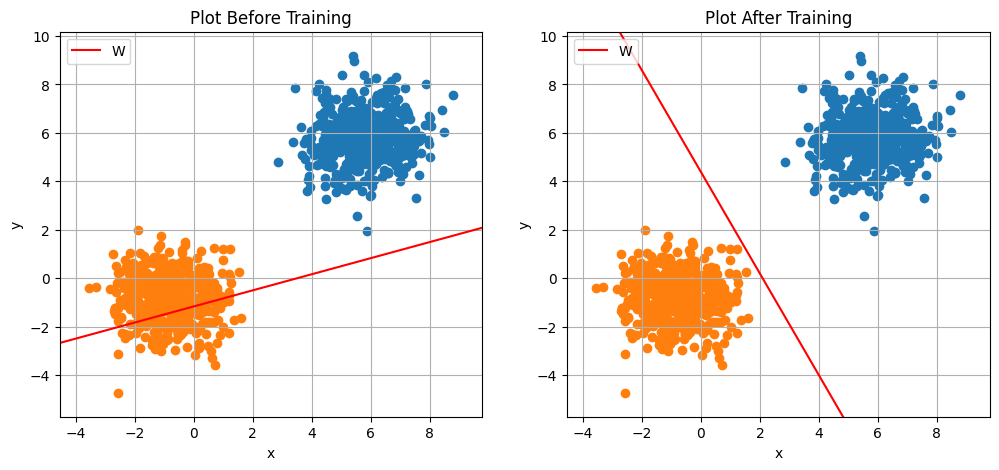



Gamma = 1.2
Early stopping at epoch number:  1
learned W = [-5.57700444  0.88258243  3.04287901] : k = 7
Early stopping at epoch number:  1
learned W = [-5.78079581  2.18339724  4.33433272] : k = 8
Early stopping at epoch number:  1
learned W = [-2.65327598  1.06608448  0.61450346] : k = 3
Early stopping at epoch number:  1
learned W = [-2.51716713 -0.0255997   0.89854936] : k = 4
Early stopping at epoch number:  1
learned W = [-5.7059836   1.49006522  3.61497878] : k = 8


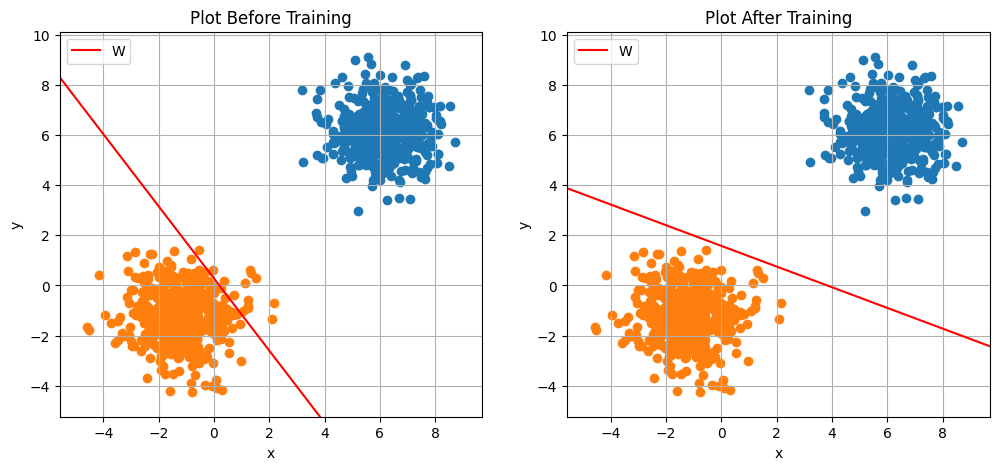



Gamma = 1.6
Early stopping at epoch number:  2
learned W = [-4.50471546  5.03214464  5.50160344] : k = 6
Early stopping at epoch number:  2
learned W = [-4.55881629  6.50429884  5.11882459] : k = 6
Early stopping at epoch number:  1
learned W = [-4.16788039  3.23806907  2.12860703] : k = 6
Early stopping at epoch number:  1
learned W = [-1.5886917   2.22289337  1.7372659 ] : k = 1
Early stopping at epoch number:  2
learned W = [-4.26875101  5.65316904  4.82919476] : k = 5


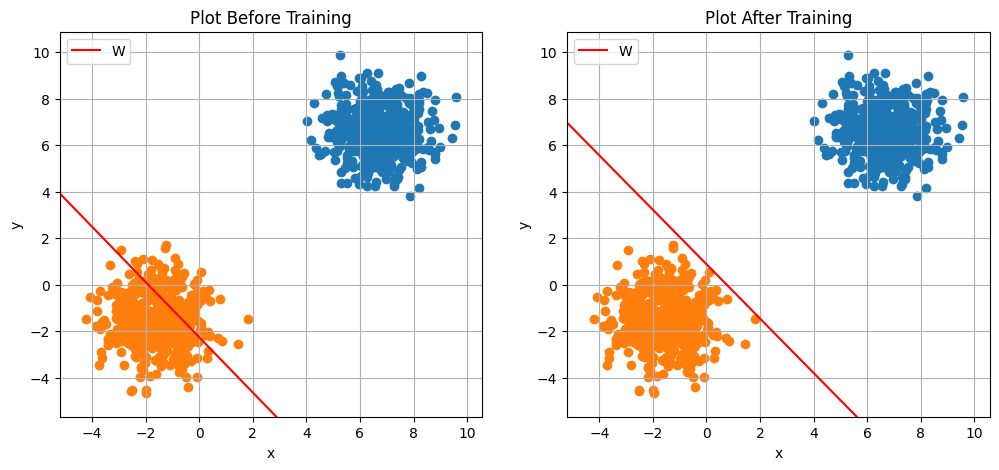

In [113]:
# list of separability (gamma)
gamma = [0, 0.4, 0.8, 1.2, 1.6]
avg_iterations = []

for i in range(len(gamma)):
    C1, C2 = generate_dataset(gamma[i])
    X, Y = add_extra_dim(C1, C2)

    print(f"Gamma = {gamma[i]}")
    avg_k = 0
    last_init_W = np.zeros(X.shape[1])
    last_learn_W = np.zeros(X.shape[1])

    for _ in range(5):
        rand_init_W = np.random.randn(X.shape[1])
        learned_W, overall_updates = perceptron_learning_algo(X, Y, rand_init_W, 1000)
        print(f"learned W = {learned_W} : k = {overall_updates}")

        avg_k += overall_updates
        last_init_W = rand_init_W
        last_learn_W = learned_W

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    plot_data_and_W(C1, C2, last_init_W, "Plot Before Training", 0)
    plot_data_and_W(C1, C2, last_learn_W, "Plot After Training", 1)
    plt.show()

    # Appending avg k's to further plot the analysis
    avg_iterations.append(avg_k/5)
    print("\n")

### Observations

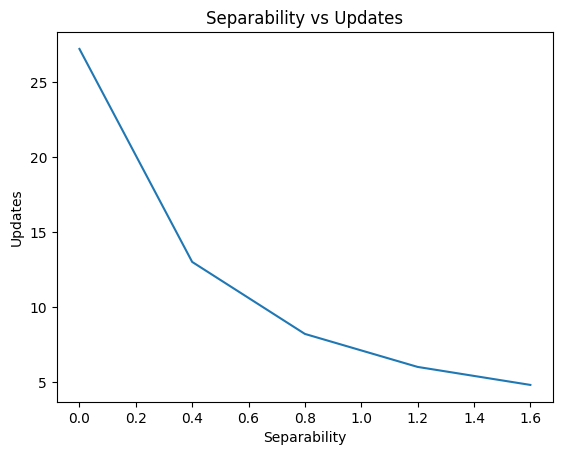

In [114]:
plt.plot(gamma, avg_iterations, marker='', linestyle='-')
plt.xlabel('Separability')
plt.ylabel('Updates')
plt.title('Separability vs Updates')
plt.show()

<br>
<br>
<br>
<br>

# Question 2
____________________

In [103]:
# Generate dataset by calling function declared in Question 1
new_C1, new_C2 = generate_dataset(0)
features, labels = add_extra_dim(new_C1, new_C2)

# Changing lables -1 --> 0
labels[1::2] = 0.0

In [104]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binary_cross_entropy_loss(y_true, y_pred):
    # To avoid log(0) very small constant is injected
    e = 1e-15
    y_pred = np.clip(y_pred, e, 1 - e)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def calculate_gradient(X, Y, W):
    Z = X.dot(W)
    Y_pred = sigmoid(Z)
    gradient = X.T.dot(Y_pred - Y) / len(Y)
    return gradient

def plot_data_and_W(X, Y, W, title, a=0):
    axes[a].scatter(X[Y == 1][:, 1], X[Y == 1][:, 2], marker='o')
    axes[a].scatter(X[Y == 0][:, 1], X[Y == 0][:, 2], marker='o')

    x = np.linspace(np.min(X[:,1])-1, np.max(X[:,1])+1, 100)
    y = -((W[1].item()/W[2].item())*x + (W[0].item()/W[2].item()))

    axes[a].plot(x, y, color='red', label='W')
    axes[a].set_title(title)
    axes[a].set_xlabel('x')
    axes[a].set_ylabel('y')
    axes[a].legend(loc='upper left')
    axes[a].grid()


### Gradient Descent Algorithm

In [105]:
def gradient_descent(X, Y, W, learning_rate, max_epochs):
    
    losses = []
    prev_loss = 10000

    for epoch in range(max_epochs):
        Z = X.dot(W)
        Y_pred = sigmoid(Z)
        loss = np.mean(binary_cross_entropy_loss(Y, Y_pred))
        gradient = calculate_gradient(X, Y, W)
        W -= learning_rate * gradient
        losses.append(loss)

        # print at every 1000 epoch
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

        total_loss = abs(prev_loss - loss)
        if total_loss <= 0.000001:
            print("Converged at epoch = ",epoch, "  with loss of = %4.3f"%total_loss)
            break

        prev_loss = loss

    return W, losses

Epoch 0, Loss: 1.1031211309289675
Epoch 1000, Loss: 0.03819168403007017
Epoch 2000, Loss: 0.02226844774411135
Epoch 3000, Loss: 0.01617506913436661
Epoch 4000, Loss: 0.012892858433995137
Epoch 5000, Loss: 0.01081925125988166
Epoch 6000, Loss: 0.009380587424830533
Converged at epoch =  6702   with loss of = 0.000


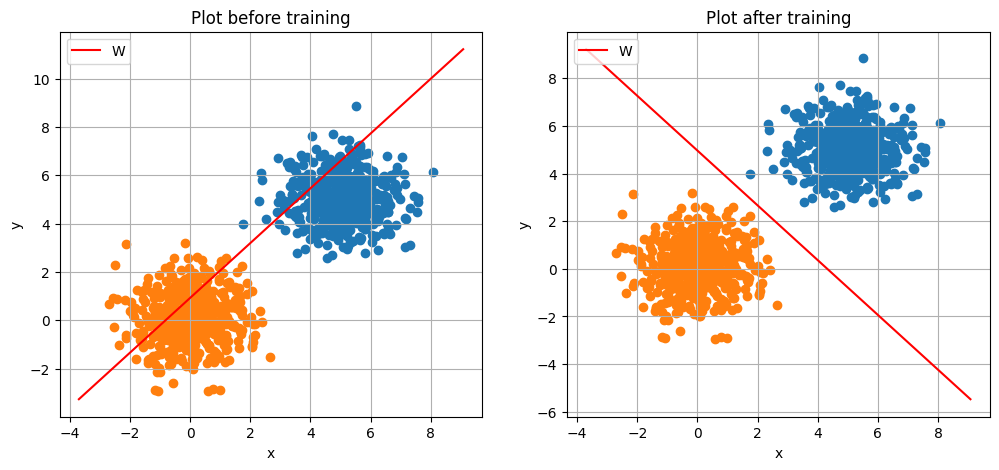

In [106]:
# Set learning rate and maximum epochs
learning_rate = 0.05
max_epochs = 10000
W = np.random.randn(X.shape[1])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_data_and_W(features, labels, W, "Plot before training", 0)
l_W, losses = gradient_descent(features, labels, W, learning_rate, max_epochs)
plot_data_and_W(features, labels, l_W, "Plot after training", 1)
plt.show()

## Observations

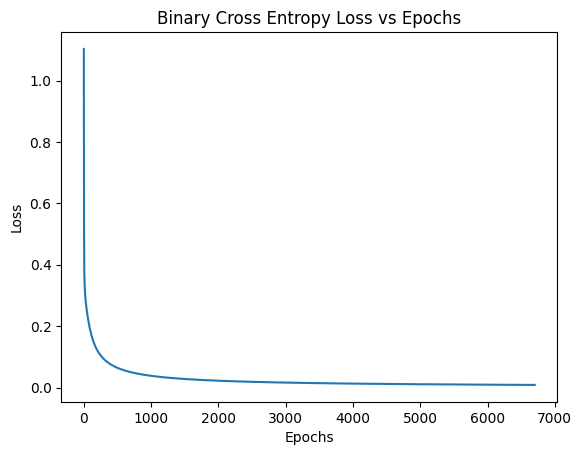

In [107]:
# Plot the loss curve
plt.plot(range(len(losses)), losses)
plt.title('Binary Cross Entropy Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

<br>
<br>
<br>
<br>

# Question 3
____________________

In [97]:
def generate_conc_dataset():
    theta = np.linspace(0, 2*np.pi, 500)
    inner_circle = 0.3 * np.random.rand(500)
    outer_circle = 0.4 + 0.3 * np.random.rand(500)

    x_inner = np.column_stack((inner_circle * np.cos(theta), inner_circle * np.sin(theta)))
    x_outer = np.column_stack((outer_circle * np.cos(theta), outer_circle * np.sin(theta)))

    # Combine data and labels
    x = np.vstack((x_inner, x_outer))
    y = np.hstack((np.zeros(len(x_inner)), np.ones(len(x_outer))))

    # randomize data
    indices = np.random.permutation(len(x))
    x = x[indices]
    y = y[indices]

    # Split into arrays
    C3 = x[y == 0]
    C4 = x[y == 1]

    return C3, C4

def plot_dataset(C3, C4):
    plt.scatter(C3[:, 0], C3[:, 1], alpha=0.5)
    plt.scatter(C4[:, 0], C4[:, 1], alpha=0.5)
    plt.title('Non Linearly separable dataset (Concentric Circle)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

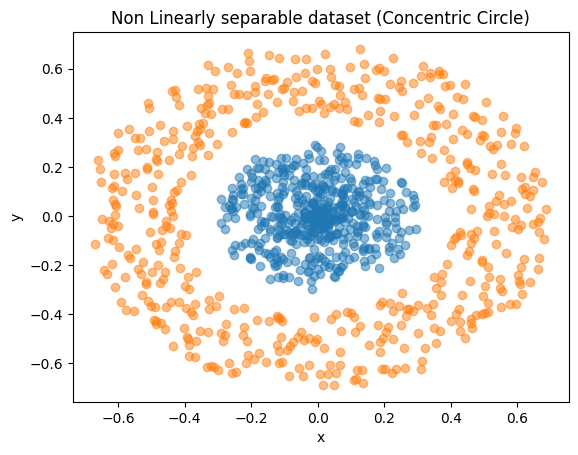

In [98]:
C3, C4 = generate_conc_dataset()
plot_dataset(C3, C4)

# Add extra dimension (bias)
XX = np.empty((1000,2))
XX[::2, 0:2] = C3
XX[1::2, 0:2] = C4

# Similarly for Y
YY = np.empty((1000,))
YY[::2] = 1.0
YY[1::2] = 0.0

# Convert labels (1000,) to column vector (1000, 1) for further compatibility
YY = YY.reshape(-1, 1)

### Required functions defined in below cell (Also MLP algo)

In [99]:
# Some required functions to train MLP

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivation(x):
    return sigmoid(x) * (1 - sigmoid(x))

def binary_cross_entropy_loss(y_true, y_pred):
    # To avoid log(0) very small constant is injected
    e = 1e-15
    y_pred = np.clip(y_pred, e, 1 - e)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [100]:
def forward_propagation(X, W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output):
    # As forward propogation further used for making prediction plot countours hence defined as function
    hidden_layer_in = np.dot(X, W_input_hidden) + B_input_hidden
    hidden_layer_out = sigmoid(hidden_layer_in)
    output_layer_in = np.dot(hidden_layer_out, W_hidden_output) + B_hidden_output
    output_layer_out = sigmoid(output_layer_in)
    return hidden_layer_in, hidden_layer_out, output_layer_in, output_layer_out

def update_parameters(X, hidden_layer_out, output_delta, hidden_layer_delta,
                       W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output,
                       learning_rate):
    # Because the output_delta is negative the updates are +=
    W_hidden_output += hidden_layer_out.T.dot(output_delta) * learning_rate
    B_hidden_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
    B_input_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate
    return W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output

def train_MLP(X, Y, hidden_size, learning_rate, epochs):
    in_size = X.shape[1]
    out_size = 1
    
    # initalizing parameters
    np.random.seed(42)
    W_input_hidden = np.random.randn(in_size, hidden_size)
    B_input_hidden = np.zeros((1, hidden_size))
    W_hidden_output = np.random.randn(hidden_size, out_size)
    B_hidden_output = np.zeros((1, out_size))
    
    for epoch in range(epochs):

        # Forward Propagation 
        hidden_layer_in, hidden_layer_out, output_layer_in, output_layer_out  = forward_propagation(X, W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output)
        
        # Backward Propagation
        output_error = Y - output_layer_out
        output_delta = output_error
        hidden_layer_error = output_delta.dot(W_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * sigmoid_derivation(hidden_layer_in)
        
        # Update Parameters
        W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output = update_parameters(X, hidden_layer_out, output_delta, hidden_layer_delta,
                               W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output,
                               learning_rate)
        # Print Loss
        total_loss = np.mean(binary_cross_entropy_loss(Y, output_layer_out))
        if epoch % 1000 == 0:
            print("Epoch ",epoch, " Loss: %4.2f"%total_loss)
            
        if total_loss <= 0.003:
            print("Converged at epoch = ",epoch, "  with loss of = %4.2f"%total_loss)
            break

    return W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output

### Functions for Analysis

In [101]:
def predict(X, W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output):
    *_, output_layer_out = forward_propagation(X, W_input_hidden, B_input_hidden,
                                                 W_hidden_output, B_hidden_output)
    # setting threshold 
    predictions = (output_layer_out > 0.5).astype(int)
    return predictions

def accuracy(predictions, actual_labels):
    correct_predictions = np.sum(predictions == actual_labels)
    total_lables = len(actual_labels)
    accuracy = correct_predictions / total_lables
    return accuracy

def plot_contour_map(X, y, W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output):
    # Generate a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    # Flatten the grid for predictions
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # forward propagation on the grid points
    *_, Z = forward_propagation(grid_points, W_input_hidden, B_input_hidden,
                               W_hidden_output, B_hidden_output)

    # prediction shape --> mesh grid shape
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Contour Map learned by MLP')
    plt.show()

### Main cell which makes call's to functions defined in above cell

Epoch  0  Loss: 0.72
Epoch  1000  Loss: 0.02
Epoch  2000  Loss: 0.01
Epoch  3000  Loss: 0.01
Epoch  4000  Loss: 0.01
Epoch  5000  Loss: 0.00
Epoch  6000  Loss: 0.00
Epoch  7000  Loss: 0.00
Converged at epoch =  7804   with loss of = 0.00

Accuracy: 100.0 %


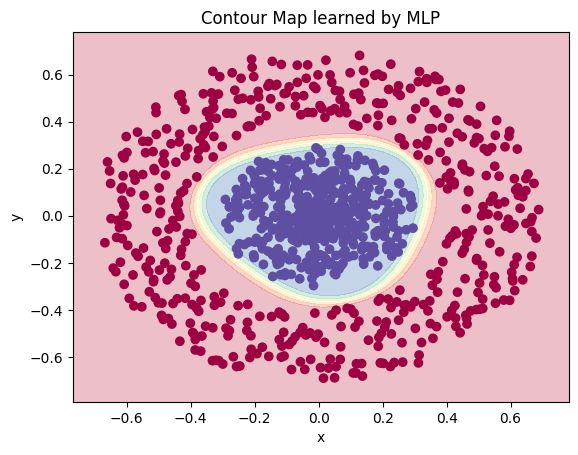

In [102]:
# Set parameters
hidden_layer_size = 4
learning_rate = 0.01
epochs = 10000

# Train MLP
W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output = train_MLP(XX, YY, hidden_layer_size, learning_rate, epochs)

# Using trained parameters to make predictions
predictions = predict(XX, W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output)

# Compute accuracy
accuracy_value = accuracy(predictions, YY)
print("\nAccuracy:", accuracy_value*100, "%")

plot_contour_map(XX, YY, W_input_hidden, B_input_hidden, W_hidden_output, B_hidden_output)